<a href="https://colab.research.google.com/github/KaSpiros/Ames_housing_data/blob/main/SDFDS_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Created by Spyridon Kalogeropoulos
---
### Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The coursework aims to explore the data and provide insights. 



Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

Import data from drive with public URL

In [ ]:
# This bit of code was taken from Stack overflow but explanation is provided.
url = 'https://drive.google.com/file/d/1nMgQQlhGOBzgwm-csEq7Uuh6_tjn7tk3/view?usp=sharing' #set url var to public url
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2] #set the path inside colab where the file is saved
df = pd.read_csv(path, sep='\t') # read the txt file

#Initial analysis

---


Initial analysis of the data set

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
df.isnull().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

From the above results we can see the quality of the data and how many of the results have Null values (Street col. had only 200 rows with values, Pool QC had only 13 similar to Misc feature. These columns need further exploration)

In [ ]:
# Check how many suplicate rows are in our set
df.duplicated().sum()

0

We can visualise the missing data with the healp of a heatmap
- White spots represent missing data

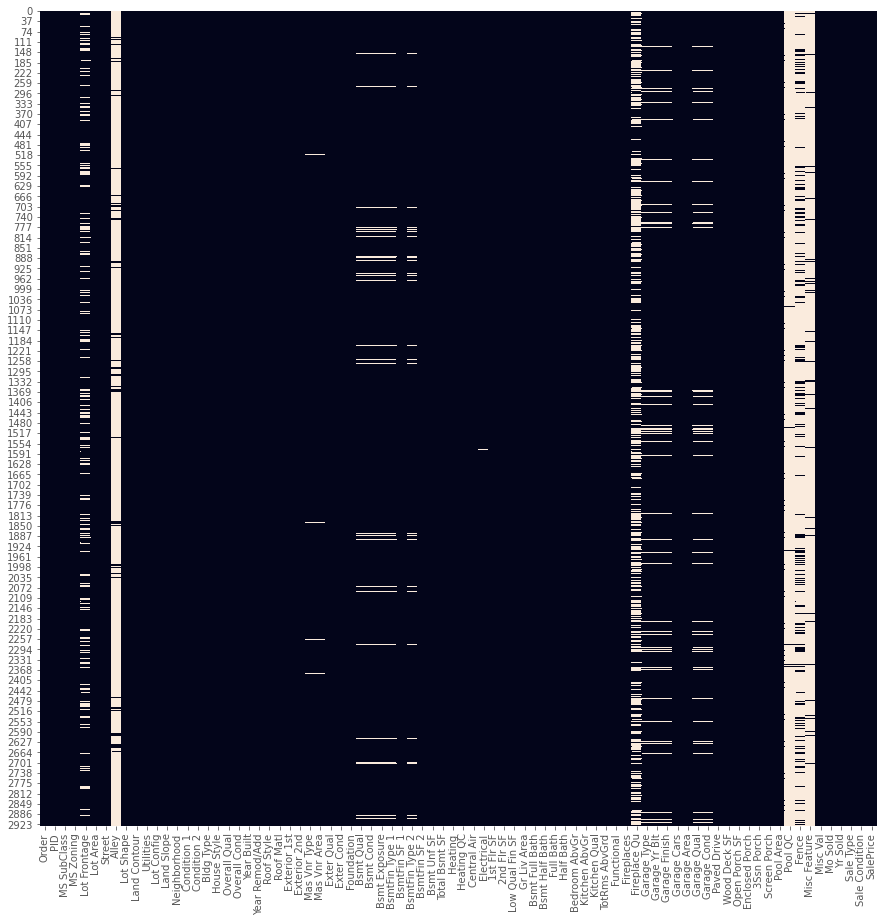

In [ ]:
#Set the map style
plt.style.use('ggplot') 
#Adjust the size
fig, ax = plt.subplots(figsize=(15,15))
#Create the heatmap using seaborn library
sns.heatmap(df.isnull(), cbar=False )

# Data Cleanup

---
Process undertaken to sanitise the data in the set and prepare them for visualisation

## Pool Quality

---


We can explore the data and see what the values in Pool QC look like bellow

In [ ]:
df['Pool QC'].head(20) #Print the first 20 rows in the Pool QC column

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Pool QC, dtype: object

###From the statement above we can see that most of the values are Nan. We are now left with two options. 1) Assume that the rows with Nan values mean there are no pools, thus replace the Nan with a value that refers to this or 2) delete the column entirely as the usable data are less than 1% ###

### Examine the data
A 3rd option different than the ones mentioned above, would be to examine the data in the other colums and attempt to identify if the house has a pool or not.

In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
checkPool = pd.DataFrame({'Pool Quality': df['Pool QC'], 'Pool Area' : df['Pool Area']}) 
# Sort the dataframe based on custom values.
checkPool.sort_values(by=['Pool Area'], ascending=False).head(20) 

,Pool Quality,Pool Area
2498,Gd,800
2735,Gd,738
2357,Fa,648
1566,Gd,576
2278,TA,561
1760,Ex,555
2350,Fa,519
2570,Ex,512
1498,Gd,480
2089,TA,444


The code above creates a new dataframe that has the values 'Pool Area' and 'Pool quality'. This way we can see that the sort the values by area and thus deduce that the values in the 'Pool Quality' series that are NaN indeed represent the items that have no pool. Therefore we can fill the gaps with our value.

In [ ]:
df['Pool QC'] = df['Pool QC'].fillna('Np') # Fill all the Nan values in the Pool QC column with the value 'Np'

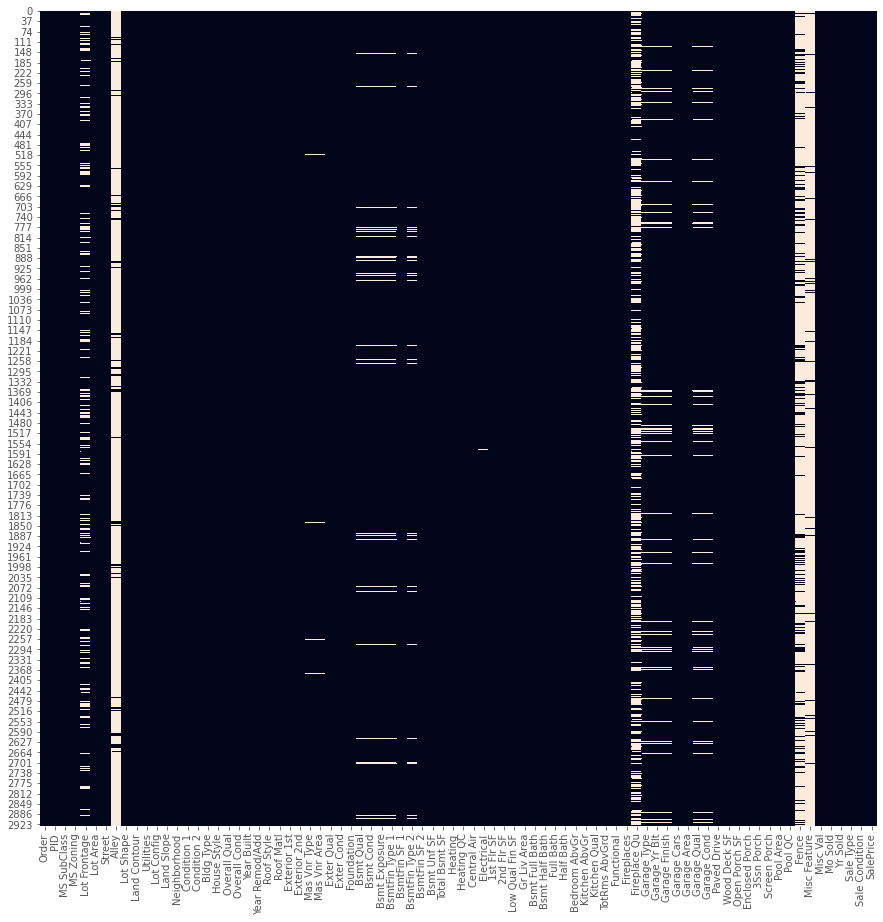

In [ ]:
plt.style.use('ggplot') # use different plot style
fig, ax = plt.subplots(figsize=(15,15)) # alter the size of the figure (15 inches by 15 inches)
sns.heatmap(df.isnull(), cbar=False ) # create a heat map

Observing the heatmap again we can see no white spaces in the Pool QC column, therefore the column has filled all the Nan values with No Pool (NP). We can repeat this process for other columns that are similar to this.

##Misc Feature
---



In [ ]:
print(str(df['Misc Feature'].isnull().sum()) + ' Null values')
print(str(len(df['Misc Feature'])) + ' Overall values')

2824 Null values
2930 Overall values


By running the same bit of code we can see that the column <B> Misc Features </B> has 2824 Null values out of 2930, therefore has an accuracy of less than 1%.
Would it be wiser to delete these values or interpret that the missing values refer to None?

If these data were of Numerical value we could use: 

```
df['Misc Feature'].describe()
```
Which would show the Mean of the said column, therefore we could potentially replace the Null values with the Mean. However our data are 'Objects' hence the dilema we are in.

Luckily, the dataset has another column that compliments the data on the 'Misc Features' column. The other column is 'Misc Val' and shows the value of each miscellaneous feature, therefore we can assume that if the feature has no value on the second column, then there is no feature adn we can safely repalce the values as we see fit. 

In [ ]:
print(df['Misc Val'].index)   # Check that the two columns have the same length and combine into a dataframe
print(df['Misc Feature'].index)

RangeIndex(start=0, stop=2930, step=1)
RangeIndex(start=0, stop=2930, step=1)


In [ ]:
misc = pd.DataFrame({'feature': df['Misc Feature'], 'value': df['Misc Val']}) # Create new dataframe with selected columns from the initial dataset for better observation and analysis
misc.sort_values(by='feature', na_position='last').head(300) # Sort and print the first 300 values

,feature,value
2180,Elev,17000
2,Gar2,12500
2668,Gar2,4500
1881,Gar2,15500
1861,Gar2,8300
1507,Gar2,3000
2479,Othr,3000
675,Othr,0
206,Othr,3500
1262,Othr,6500


From the above dataframe we can see that most of the Features that are NaN also have Value 0, which makes it safe to assume that the houses dont have any features. Therefore, we can fill the NaN values with None

In [ ]:
df['Misc Feature'].fillna('NoFeature', inplace = True) # Replace all Nan Values

## Lot Frontage
---
Again we check the null sum.


In [ ]:
df['Lot Frontage'].isnull().sum()

490

And we explore the said collumn. Lot frontage in this data sample refers to 'Linear feet of street connected to property', therefore we can either assume that these properties are not connected to the street and replace the NaN values with 0 or using the method above, replace the values with Mean, Mode or Median.

In [ ]:
df['Lot Frontage'].head(20)

0     141.0
1      80.0
2      81.0
3      93.0
4      74.0
5      78.0
6      41.0
7      43.0
8      39.0
9      60.0
10     75.0
11      NaN
12     63.0
13     85.0
14      NaN
15     47.0
16    152.0
17     88.0
18    140.0
19     85.0
Name: Lot Frontage, dtype: float64

Again we might try to predict the Lot Frontage value based on other columns but we dont have much data to go with. Based on the data we are left with the 2 options mentioned above.

In [ ]:
checkPool = pd.DataFrame({'Lot Front': df['Lot Frontage'], 'Lot Area' : df['Lot Area'], 'Location': df['MS Zoning'], 'Lot Config': df['Lot Config']}) # Create new dataframe with selected columns from the initial dataset for better observation and analysis
checkPool.sort_values(by='Lot Front', na_position='first').head(500)

,Lot Front,Lot Area,Location,Lot Config
11,NaN,7980,RL,Inside
14,NaN,6820,RL,Corner
22,NaN,7500,FV,Inside
23,NaN,11241,RL,CulDSac
24,NaN,12537,RL,CulDSac
55,NaN,7851,RL,Inside
57,NaN,7750,RL,Inside
58,NaN,9505,RL,CulDSac
74,NaN,8880,RL,Inside
79,NaN,9453,RL,CulDSac


Assuming that the reason why there is no data in these rows is due to the value being zero, we will fill all the NaN values with 0. This is a rather dangerous decision to take as it could lead us to false assumptions.

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0) # Replace all the Nan values
df['Lot Frontage'].isna().sum() # check that there are no Nan values

0

##Alley

---


The next large amount of emty rows is in the Alley column, which has over 99% NaN values. Due to the nature of this column and the impact that could have in the data, it was decided best to drop this column as it seemed to not have any correlation with any other column.

In [ ]:
del df['Alley'] # Drop column

## Fireplace Quality

---

In this occasion despite missing multiple values, we can compare this column against the 'Fireplaces' column which has no missing data and indicates the amount of fireplace in the house. Therefore if there are no fireplaces in the house and the quality value is NaN we can replace it with <b>Nf (No fireplace).</b>


In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
check_fireplace = pd.DataFrame({'No. of Fireplace': df['Fireplaces'], 'Fireplace Quality' : df['Fireplace Qu']}) 

check_fireplace.sort_values(by='Fireplace Quality', na_position='last')

,No. of Fireplace,Fireplace Quality
1418,1,Ex
1689,1,Ex
1690,1,Ex
350,1,Ex
887,1,Ex
2456,1,Ex
1306,1,Ex
47,1,Ex
2395,3,Ex
1059,1,Ex


From the above data, we can see that there is a direct corelation between the Number of fireplace and the NaN values in the Fireplace Quality column. Therefore we can replace the NaN values with something that can makes more sense.

In [ ]:
# Replace all the Nan values
df['Fireplace Qu'].fillna('Nf', inplace = True)

## Fence

---
According to Google, a fence can increase the value of a house up to 20%, therefore the fence coolumn could help us understand our data sample and make better predictions. </br> However, the fence column has over 2300 Null values, which means that  <code><1%</code> of the column has Non-null values. Which brings up the usual question, if we should keep that data and interpret the missing values as 'No Fence' or drop the column all together. 

In [ ]:
df['Fence'].isna().sum()

2358

We could try comparing the Fence column to some other data to gain a possible insight, but that would still be theories since we dont have a column to help us make a definite decision. 
</br>A safe perhaps assumption would be that if a house has a pool then it probably has a fence. Also, if the property has a paved driveway, could help us decide if it would have a fence and another parameter  might be the Building type.

In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
fence = pd.DataFrame({'Fence type': df['Fence'], 'Building type' : df['Bldg Type'], 'Pool' : df['Pool QC'], 'Paved Drive' : df['Paved Drive'], 'Neighborhood': df['Neighborhood'], 'Lot Area':df['Lot Area']}) 

# Sort and print the values
fence.sort_values('Fence type', na_position='last').head(700)

,Fence type,Building type,Pool,Paved Drive,Neighborhood,Lot Area
2125,GdPrv,1Fam,Np,Y,CollgCr,16561
932,GdPrv,Twnhs,Np,Y,Blueste,1733
933,GdPrv,TwnhsE,Np,Y,Blueste,1488
935,GdPrv,TwnhsE,Np,Y,Blueste,1300
937,GdPrv,1Fam,Np,Y,Crawfor,17597
593,GdPrv,1Fam,Np,Y,NAmes,7130
2568,GdPrv,1Fam,Np,Y,NAmes,14200
2278,GdPrv,1Fam,TA,N,Mitchel,43500
564,GdPrv,1Fam,Np,Y,NoRidge,11949
2258,GdPrv,1Fam,Np,Y,Timber,19958


Since the data insight doenst give us a definite answer about wheather the property has a fence, we have to decide to either drop the column or assume the property doesnt have any. In our case that the NaN values represent properties with no fence. It is of outmost importance to understanf that this could result into biased data,

In [ ]:
# Replace all the Nan values
df['Fence'].fillna('Nf', inplace = True)

## Masonry veneer type
---
About 23 values in this column are Nan values, therefore we can choose to explore the data or drop the rows that have NaN values.


In [ ]:
#Print how many Null values are 'Mas Vnr Type' column.
print('Type: ' + str(df['Mas Vnr Type'].isna().sum()))

#Print how many Null values are 'Mas Vnr Area' column.
print('Area: ' + str(df['Mas Vnr Area'].isna().sum()))


Type: 23
Area: 23


By comparing the Two columns we can see that the values that are Null in the first column are also Null in the secodn column. Therefore, we can safely assume that these properties dont have Masonry veneer and alter the data as so.

In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
mas = pd.DataFrame({'Mas Vnr Type': df['Mas Vnr Type'], 'Mas Vnr Area': df['Mas Vnr Area']})

# Sort and print values
mas.sort_values('Mas Vnr Type', na_position='first').head(30)


,Mas Vnr Type,Mas Vnr Area
55,NaN,NaN
484,NaN,NaN
517,NaN,NaN
538,NaN,NaN
867,NaN,NaN
1095,NaN,NaN
1119,NaN,NaN
1122,NaN,NaN
1127,NaN,NaN
1184,NaN,NaN


In [ ]:
# Fill all the NaN values with usefull data
df['Mas Vnr Type'].fillna('None', inplace = True)
df['Mas Vnr Area'].fillna(0, inplace = True)

##Basement
---
Similarly to the previous data sets, this one as well has null values that need to be addressed accordingly.


In [ ]:
#Print how many Null values 'Bsmt Qual' column has.
print('Quality: ' + str(df['Bsmt Qual'].isna().sum()))

#Print how many Null values 'Bsmt Cond' column has.
print('Condition: ' + str(df['Bsmt Cond'].isna().sum())) 

#Print how many Null values 'Bsmt Exposure' column has.
print('Exposure: ' + str(df['Bsmt Exposure'].isna().sum()))


Quality: 80
Condition: 80
Exposure: 83


From the data above we can see that the Null values in the three datasets are close in number.

In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
basement = pd.DataFrame({'Quality': df['Bsmt Qual'], 'Condition': df['Bsmt Cond'], 'Exposure': df['Bsmt Exposure']})

# Sort and print values
basement.sort_values('Exposure', na_position='first').head(100)

,Quality,Condition,Exposure
66,Gd,TA,NaN
83,NaN,NaN,NaN
154,NaN,NaN,NaN
206,NaN,NaN,NaN
243,NaN,NaN,NaN
273,NaN,NaN,NaN
275,NaN,NaN,NaN
290,NaN,NaN,NaN
551,NaN,NaN,NaN
649,NaN,NaN,NaN


By further exploring the data we can clearly see that all the NaN values in Quality also match the position of the NaN values in Condition meaning that the propery has no basement. Furthermore, the Exposure column further strengthens this suspicion as all but 3 values are NaN in the same index position as the previous columns.

In [ ]:
# Fill all the NaN values with usefull data
df['Bsmt Qual'].fillna('NB', inplace = True)
df['Bsmt Cond'].fillna('NB', inplace = True)

Running the same code again we can further compare the NaN values in the Exposure dataset.


In [ ]:
# Create new dataframe with selected columns from the initial dataset for better observation and analysis
basement = pd.DataFrame({'Quality': df['Bsmt Qual'], 'Condition': df['Bsmt Cond'], 'Exposure': df['Bsmt Exposure']})

# Sort and print values
basement.sort_values('Exposure', na_position='first').head(100)

,Quality,Condition,Exposure
66,Gd,TA,NaN
83,NB,NB,NaN
154,NB,NB,NaN
206,NB,NB,NaN
243,NB,NB,NaN
273,NB,NB,NaN
275,NB,NB,NaN
290,NB,NB,NaN
551,NB,NB,NaN
649,NB,NB,NaN


This time however we can deduce that the 3 values that show the existance of a basement in the previous columns and are NaN in the Exposure column, mean that there is no basement exposure. Therefore we must mark the Nan values accordingly.

In [ ]:
# In this very handy bit of code that took me about 30 mins to write, we do the following.
# We locate the 3 values that match our criteria with df.loc()
# Then we fill the nan values with NE value .fillna('NE)
# Lastly, since df.loc creates a virtual copy of the original Dataframe,
# We need to update the original dataframe with the updated copy df.update()

df.update(df.loc[(df['Bsmt Qual'] == 'Gd') & (df['Bsmt Cond'] == 'TA') & (df['Bsmt Exposure'].isna())].fillna('NE'))

# Check the sum of null values after update should be 80.
df['Bsmt Exposure'].isna().sum()

80

Fill the rest of the values in the set, that should refer to houses that have no basement at all with a relevant value

In [ ]:
df['Bsmt Exposure'].fillna('NB', inplace=True)
df['Bsmt Exposure'].isna().sum()

0

#### Basement condition

---
By grouping all the previous data together we can analyse the 2 columns that refer to the basement finished area. 'BsmtFin Type 1 & 2'.</br>
After a quick look we can see that the values that are NaN in these two columns aos have the value NB (no basement) we set earlier. Therefore, we conclude that the houses have no basement area.

In [ ]:
#Create new DataFrame with all the relevant columns
basement_condition = pd.DataFrame({'Type': df['Bsmt Qual'], 'Condition': df['Bsmt Cond'], 'Exposure': df['Bsmt Exposure'],'BsmtFin Type 1': df['BsmtFin Type 1'],'BsmtFin Type 2': df['BsmtFin Type 2']}) 
basement_condition.head(200)

,Type,Condition,Exposure,BsmtFin Type 1,BsmtFin Type 2
0,TA,Gd,Gd,BLQ,Unf
1,TA,TA,No,Rec,LwQ
2,TA,TA,No,ALQ,Unf
3,TA,TA,No,ALQ,Unf
4,Gd,TA,No,GLQ,Unf
5,TA,TA,No,GLQ,Unf
6,Gd,TA,Mn,GLQ,Unf
7,Gd,TA,No,ALQ,Unf
8,Gd,TA,No,GLQ,Unf
9,TA,TA,No,Unf,Unf


In [ ]:
df['BsmtFin Type 2'].fillna('NB', inplace=True)
df['BsmtFin Type 1'].fillna('NB', inplace=True)

## Garage

---

This is probaly the last item that is worth cleaning up, as it has over 150 null values

In [ ]:
garage = pd.DataFrame({'Location': df['Garage Type'], 'Condition': df['Garage Cond'], 'Year': df['Garage Yr Blt'],'Finish': df['Garage Finish'],'Cars': df['Garage Cars'], "Garage Qual": df['Garage Qual'],  'Area': df['Garage Area'],})
garage.isna().sum()

Location       157
Condition      159
Year           159
Finish         159
Cars             1
Garage Qual    159
Area             1
dtype: int64

It would be wise at first to explore the smaller values

In [ ]:
# Sort Cars column with NaN first
garage.sort_values('Cars', na_position='first').head(200)

,Location,Condition,Year,Finish,Cars,Garage Qual,Area
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN
2287,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2679,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2670,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2669,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2667,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1491,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1486,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1485,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2634,NaN,NaN,NaN,NaN,0.0,NaN,0.0


For some reason in the cars column there is a single value as NaN instead of the usual 0 that refers to no cars. </br>This could be due to data being corrupted or there was not enough information to proceed. </br>
Since there is a single column with this peculiar data form we can simply drop the row without affecting the rest of the data.

In [ ]:
df.dropna(subset=['Garage Cars'], inplace = True)
df['Garage Cars'].isna().sum()

0

We can do the same with the Area column

In [ ]:
df.dropna(subset=['Garage Area'], inplace = True)
df['Garage Area'].isna().sum()

0

Lastly, there is one more issue to resolve before filling the rest of the NaN values. 

```
garage.isna().sum()
```
Showed that the column 'Location' has two less NaN values than 'Condition','Year','Quality' columns

---
We can search for these rows that have a value in the Location column but are empty in the rest columns (One column should be enough)

In [ ]:
df.loc[(df['Garage Type'].notna()) & (df['Garage Finish'].isna())]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1356,1357.0,903426160.0,60.0,RM,57.0,8094.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6.0,8.0,1910.0,1983.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242.0,742.0,0.0,1984.0,0.0,0.0,2.0,0.0,5.0,1.0,TA,8.0,Typ,0.0,Nf,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64.0,0.0,180.0,0.0,0.0,0.0,Np,MnPrv,Shed,1000.0,9.0,2008.0,WD,Normal,160000.0


Above we concude that one of these rows was dropped earlier, therefore we only have one row returned

In [ ]:
#Drop row based on Index
df.drop(df.index[1356], inplace=True)

Fill the remaining Nan gaps in the dataset accordingly.

In [ ]:
df.fillna({'Garage Type':'NG', 'Garage Finish':'NG', 'Garage Qual': 'NG', 'Garage Cond': 'NG', 'Garage Yr Blt': "0"}, inplace=True)

## Finish the cleanup

---
Lastly, we will double check that our data set looks clean enough and drop rows that have less than 5 null values

In [ ]:
df.isna().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       1
BsmtFin Type 2     0
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

In [ ]:
df.dropna(inplace=True) #Drop all NaN Rows
df.reset_index(drop=True, inplace=True) # Reset the index count

According to the documentation, we should remove outliers from the data set. The author identifies these outliers as houses that have an area more than 4000 square feet and suggests a simple plot diagram to see them.

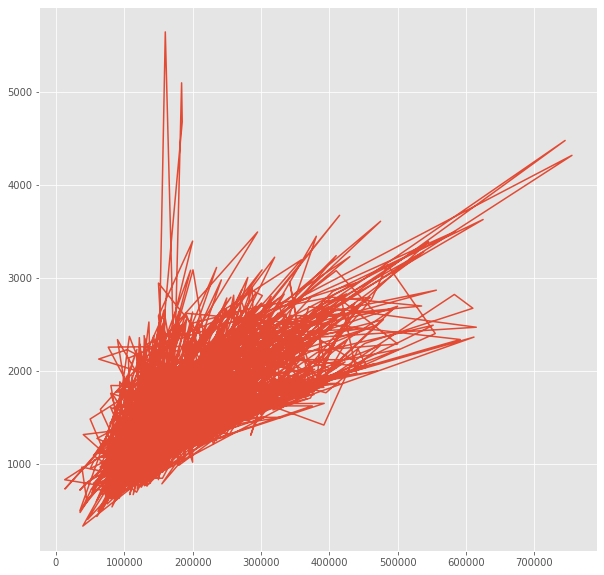

In [ ]:
plt.figure(figsize=(10,10),facecolor=('white'), edgecolor='b') 
plt.plot(df['SalePrice'], df['Gr Liv Area'])

Indeed some data have unussual values, we will therefore drop them.

In [ ]:
# Set houses with more than 4000 square feet as indexNames
indexNames = df[ df['Gr Liv Area'] > 4000 ].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

# Confirm no values larger than 4000 exist
df['Gr Liv Area'].sort_values().tail()

1306    3493.0
2445    3500.0
2661    3608.0
2440    3627.0
2732    3672.0
Name: Gr Liv Area, dtype: float64

# Data Visualisation

---
In this section we will attempt to visualise the data and find usefull information.

## Sale price by Number of sales

---


On the histogram below, we display the sale price of each house in comparison 
to the amount of sales. 

The information show that most houses are sold between the price of 100 and 300 thousand.



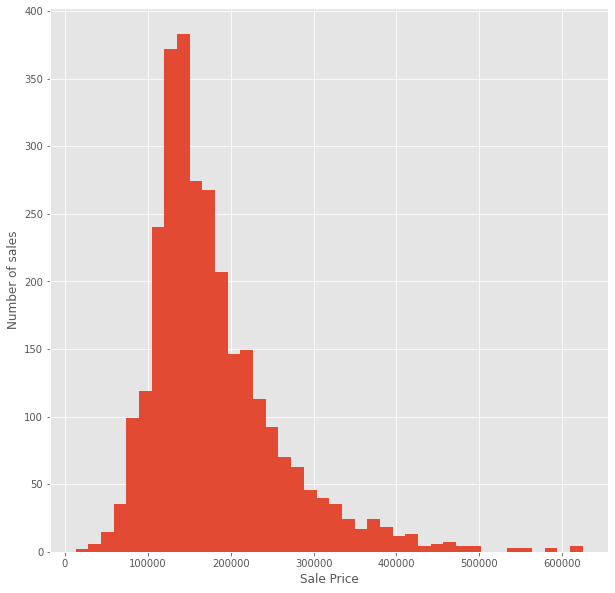

In [ ]:
plt.figure(figsize=(10,10),facecolor=('white'), edgecolor='b') #adjust the size, background colour and edgecolour(Idk why this doesnt work)
plt.hist(df['SalePrice'], bins=40) # Set the value to be displayed and also the amount of bins
plt.xlabel("Sale Price") # Set x label
plt.ylabel("Number of sales") # Set y label
plt.show()

## Price per square foot

---

It would be usefull to see some information about the price against the greater living area.

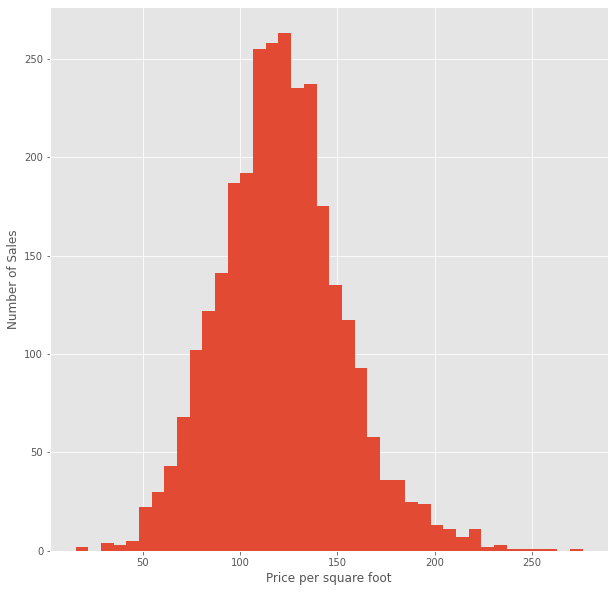

In [ ]:
df['sqrf'] = df['SalePrice'] / df['Gr Liv Area'] # Create new dataframe and set the values as the outcome of price / area
plt.figure(figsize=(10,10),facecolor=('white'), edgecolor='b')
plt.hist(df['sqrf'], bins=40)
plt.ylabel('Number of Sales')
plt.xlabel('Price per square foot')
plt.show()

On the diagram above we see that the average price per square foot is between 100 and 150.</br>
In fact <code>df['sqrf'].mean()</code> shows us that the outcome is <b>121.5</b>

## Price of square foot per year

---


Bellow we are creating a Box plot that can help us visualise the Price per square foot per year.</br>
Box plots are handy cause they display five different values in a single plot.

*   Maximum Value
*   First quartile
* Median (second quartile)
* Third quartile
* Minimum value

The diagram shows that throughout the years, despite major economical hardships, the median value for houses sold in Ames remains surpisingly the same (Including the global financial crisis).


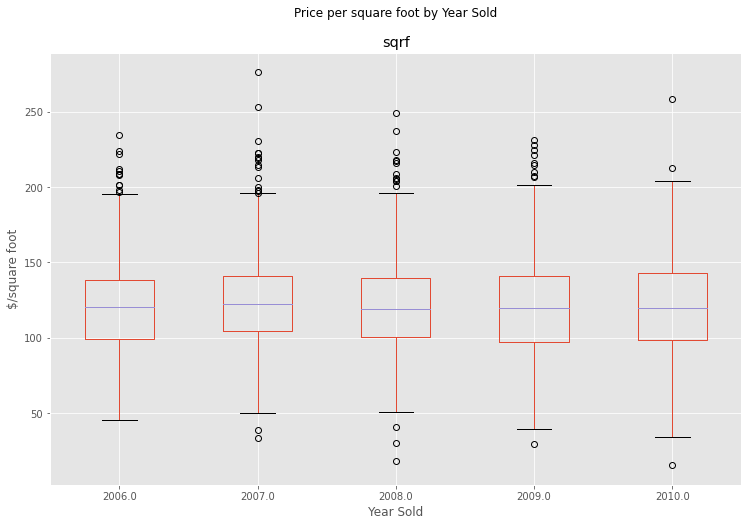

In [ ]:
df.boxplot(column=['sqrf'], by=['Yr Sold'], figsize=(12,8))
plt.suptitle('Price per square foot by Year Sold')
plt.ylabel('$/square foot')
plt.xlabel('Year Sold')
plt.show()

## Price of square foot in comparison to building type.
---
Since we have a column that categorises the data in building types it could be usefull to draw some information using that.

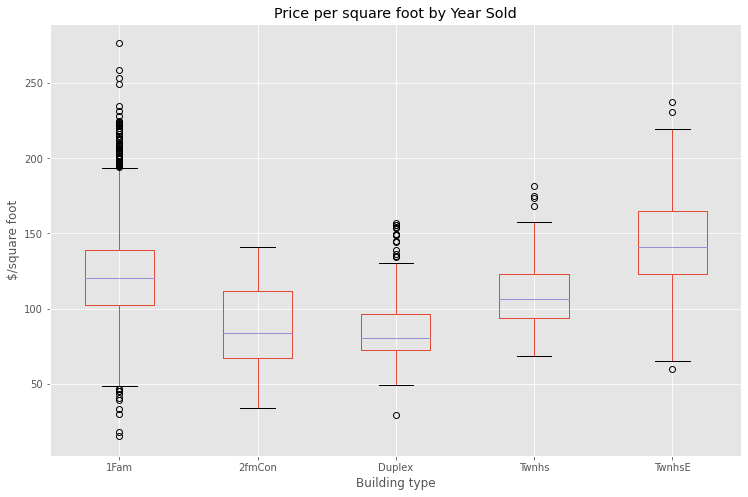

In [ ]:

df.boxplot(column=['sqrf'], by=["Bldg Type"], figsize=(12,8))
plt.title('Price per square foot by Year Sold')
plt.suptitle('')
plt.ylabel('$/square foot')
plt.xlabel('Building type')
plt.show()

We can see that the single-family detatched houses and the Townhouse end units cost significanty more per square foot than the rest of the houses in our column 

## Overall condition per square foot
---

Using a box plot will be easir to do a comparison between the price per square foot and the overall house condition
</br> Taking a closer look we see that the condition only affects the price to some extend, houses with mediocre condition have been sold for much higher price than those in excelent condition.

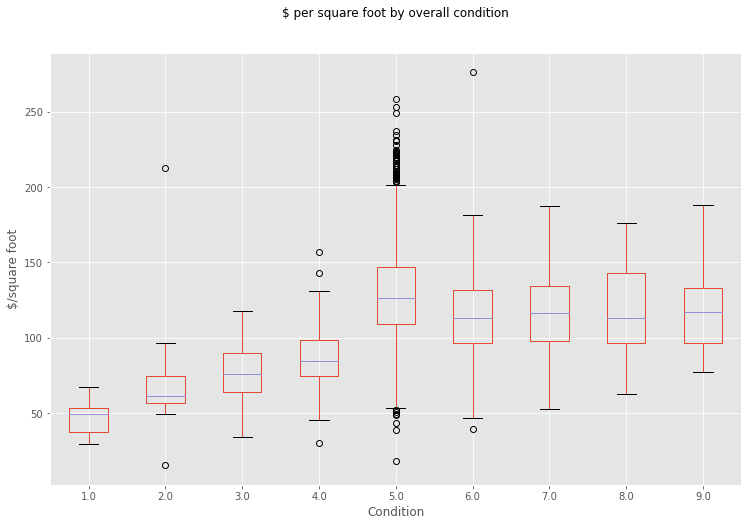

In [ ]:
df.boxplot(column=['sqrf'], by=['Overall Cond'], figsize=(12,8))
plt.suptitle('$ per square foot by overall condition')
plt.title('')
plt.ylabel('$/square foot')
plt.xlabel('Condition')
plt.show()

## Sale price against pool
---
Since we spent quite a bit of time fixing the values in the pool column, it would be a waste not to use it somehow. </br>
The data have hardly any variance therefore aren't providing any usefull insights.


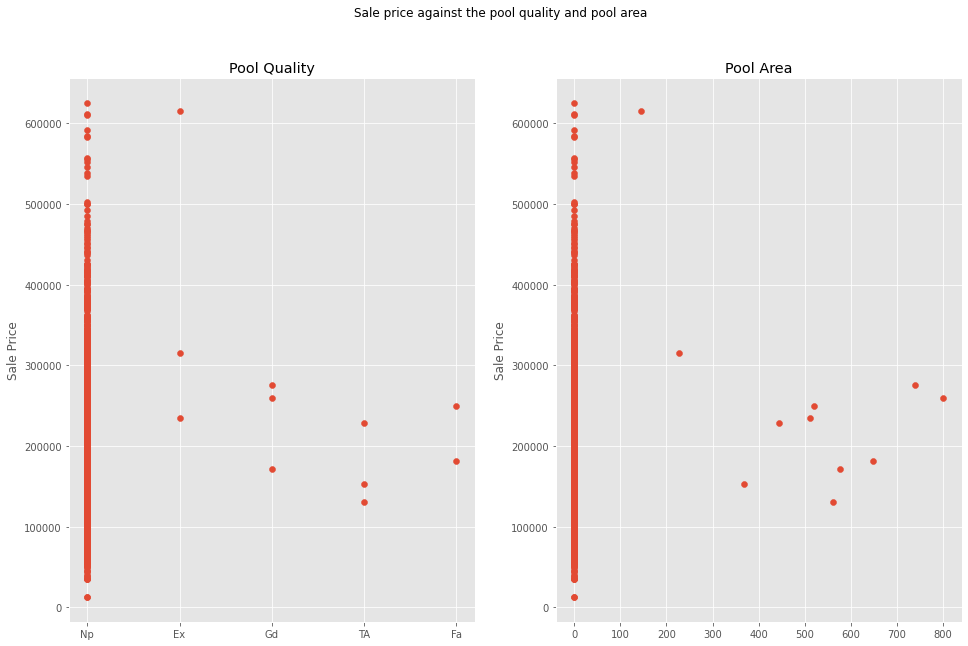

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,10),facecolor = ('white'))  # 1 row, 2 columns

# Set plot data
y1 = df['SalePrice']
x1 = df['Pool QC']

y2 = df['SalePrice']
x2 = df['Pool Area']

#Set plot labels
ax1.set_title('Pool Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Pool Area')
ax2.set_ylabel("Sale Price")

fig.suptitle('Sale price against the pool quality and pool area')

#Create plots
ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

# plt.tight_layout()

## Garage Size in comparison house value
---
Size of garage area in comparison to Square feet. We can see that the garage area contributes to the house price, up to 1000 squear feet, as the garage area expands further then it no longer has any significancy to the overall price.

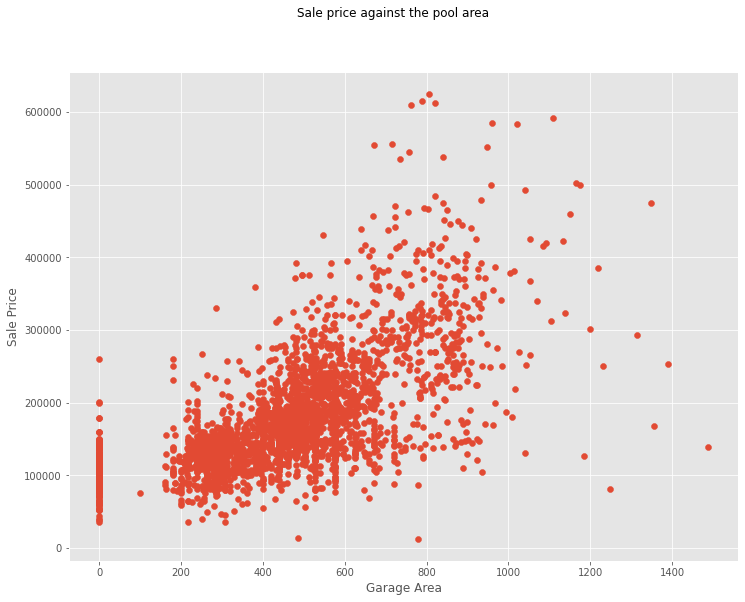

In [ ]:
plt.figure(figsize=(12,9),facecolor=('white'), edgecolor='b')
plt.suptitle('Sale price against the pool area')
y = df['SalePrice']
x = df['Garage Area']
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.scatter(x,y)

## Multiple charts

---
Lets visualise some data to find trends and patterns.

Text(0.5, 1.0, 'Sale Price / Foundation type')

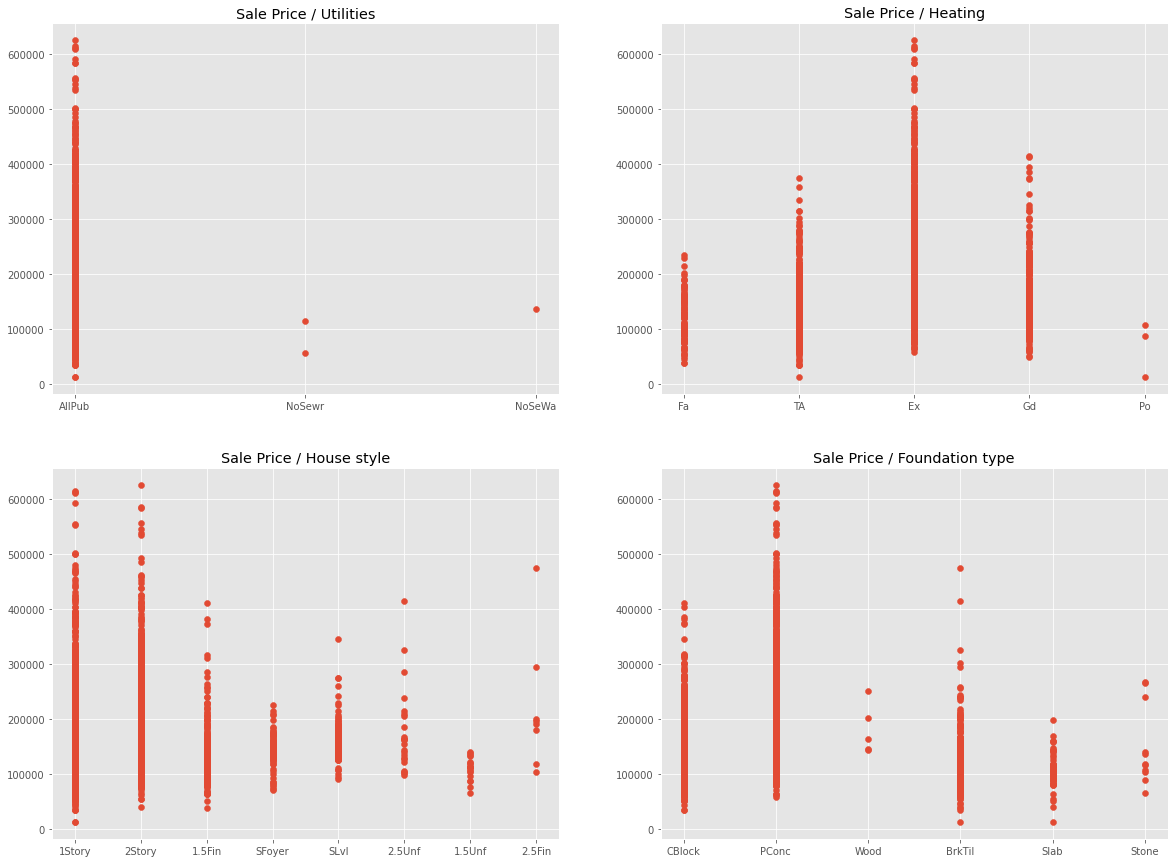

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,15),facecolor = ('white'))

y = df['SalePrice']

x = df['Utilities']
x2 = df['Heating QC']
x3 = df['House Style']
x4 = df['Foundation']

axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Sale Price / Utilities')
axs[0, 1].scatter(x2, y)
axs[0, 1].set_title('Sale Price / Heating Quality')
axs[1, 0].scatter(x3, y)
axs[1, 0].set_title('Sale Price / House style')
axs[1, 1].scatter(x4, y)
axs[1, 1].set_title('Sale Price / Foundation type')


As seen above we can draw some conlusions about the data and how they might affect the sale price, however this would be very time consuming and quite inefficient.

## Correlation coeficient

---
It analyzes if the variables are related. “0” suggests that the variables are not related to each other, and “1” reveals a positive or a negative correlation.

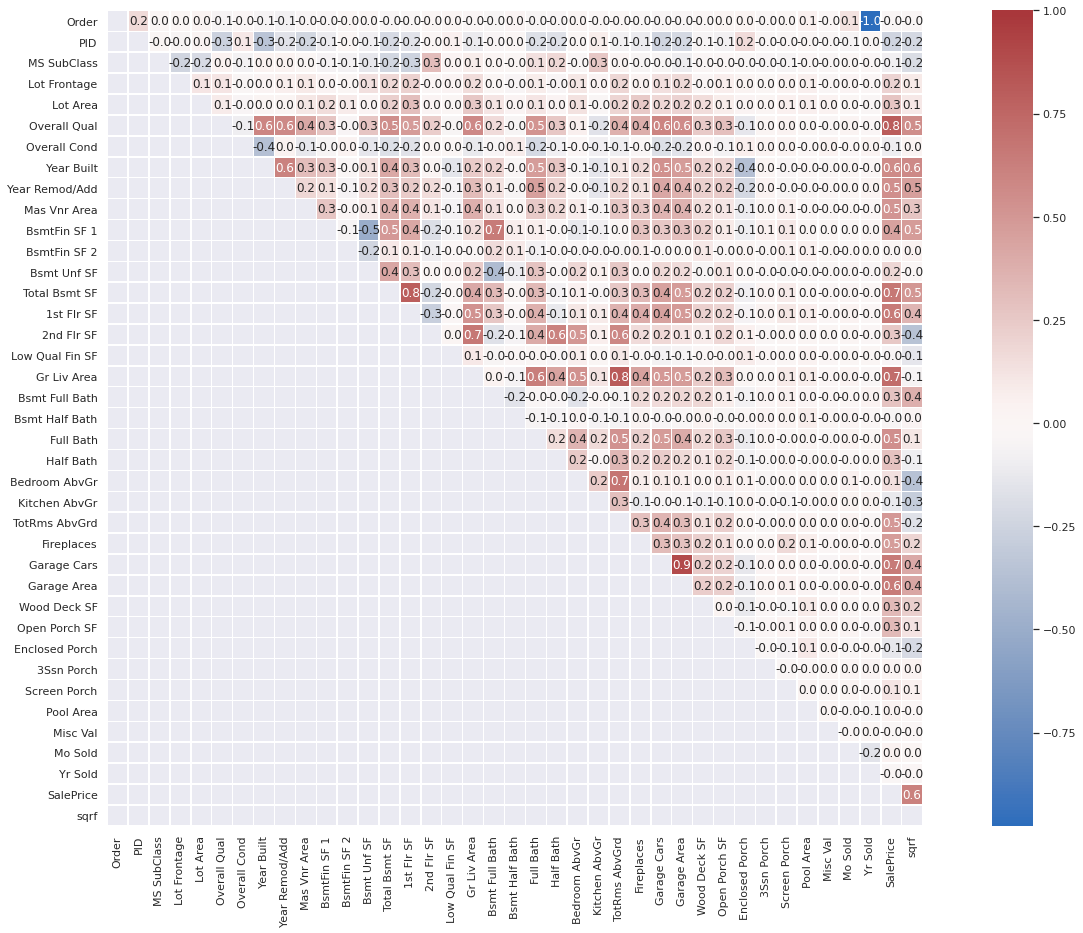

In [ ]:
# Why I decided to use this? (https://github.com/amitg0161/Sklearn_learning/blob/master/boston_house_sklearn-checkpoint.ipynb)
# Why use Coefficient corelation? (https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp)
# In this bit of code we are using the seaborn library that we used earlier as well
# Source (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# Return an array of zeros with the same type as a given array but type of boolean.
array = np.zeros_like(df.corr(), dtype=np.bool)

# Return the indices for the lower-triangle of arr.
array[np.tril_indices_from(array)] = True

plt.figure(figsize=(25,15))

sns.heatmap(corr, mask=array, cmap="vlag", vmax=1, center=0, annot=True, fmt='.1f',square=True, linewidths=.5, cbar=True)

According to the graph above we can refer to the 'Sale Price' y-label and easily distinguish which prices are dirrectly related to it.

---
With a quick look we see that Overal Quality, Year Built, Total Bsmt SF, Garage Cars and Garage Area affect the house price the most.


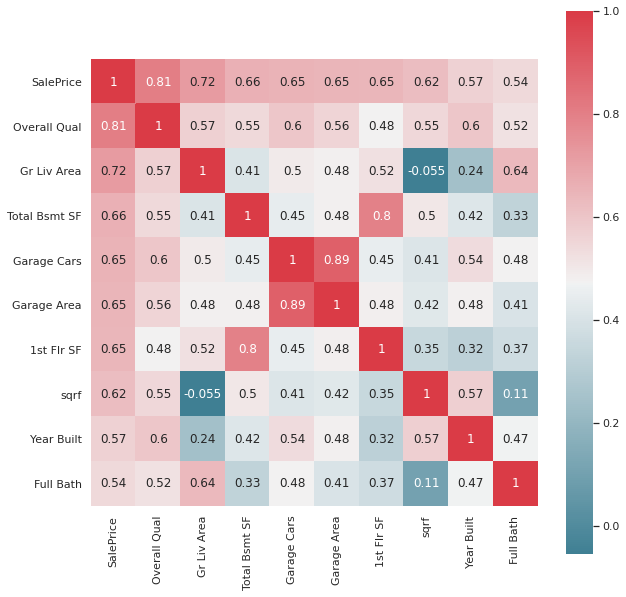

In [ ]:
#Set figure size
plt.figure(figsize=(10,10))
# Select the 10 columns with the highest corelation and add them in index
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
# Return Pearson product-moment correlation coefficients.
cm = np.corrcoef(df[cols].values.T)
#Set size of font
sns.set(font_scale=1)
#Create the heatmap
sns.heatmap(cm, annot=True, square=True, cmap=cmap, yticklabels=cols.values, xticklabels=cols.values)

Looking at the values in the heatmap we see that we have garage Cars and Garage area with the same significancy, so we can discard one. Now that we know which columns are those of highest interest to us we can try some machine learning techniques to predict future house prices.

# Machine Learning
---
In this section we will attempt to use regression models to predict house prices.


## Linear Regression algorithm

---

In order to predict the house value, we will make use the strongest coefficient value identified earlier.


In [ ]:
# The following bit of code was drawn from the boston dataset
# As I am still unsure how exactly this code works I will attempt to describe as good as possible.

quality = df['Overall Qual']
price = df['SalePrice']

# Reshape the columns in 2-D to be able to pass them into the train_test_split function
quality = np.array(quality).reshape(-1,1)
price = np.array(price).reshape(-1,1)

# plit the values that we will be using for testing and training.
Q_train_1, Q_test_1, P_train_1, P_test_1 = train_test_split(quality, price, test_size = 0.15, random_state=5)

In [ ]:
# Select the method of prediction.
reg_1 = LinearRegression()
# Fit the values
reg_1.fit(Q_train_1, P_train_1)

In [ ]:
p_train_predict_1 = reg_1.predict(Q_train_1)
rmse = (np.sqrt(mean_squared_error(P_train_1, p_train_predict_1)))
score = round(reg_1.score(Q_train_1, P_train_1),2)

print('Prediciton score {}'.format(score))

Prediciton score 0.65


The above score is quite low, perhaps by using another algorithm we could raise the score higher. But that is for a future time as for now we can conclude with what has been learned so far.

# Conclusion

---

Reflecting back to the beggining of the coursework I must admit that quite a few things could have been done better and certainly could have spend much less time tidying the data. 
</br>
Many of the columns that we spend an enormous amount of time fixing ended up not being used at all, in fact only ten of the 28 columns were used to predict house prices. However, it was definitely good practice and a good starting point.
</br>
In terms of data visualisation I believe that perhaps some visualisations could have resulted better but they gave us some good insights about factors that influence the house market prices.
</br>
One of the most important graphs was that of correlation coefficient which showed us which values can be used in combination with ML to make predictions.
</br>
Finally, as the data set is tidy, it can also be used for other purposes apart from price prediction. With the use of other ML algorithms we could perhaps achieve better results in our attempt to make price predictions.
